# Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. 

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [156]:
df=pd.read_csv("Country-data.csv")

In [157]:
df.shape

(167, 10)

The dataset contains 167 rows and 10 columns.

In [158]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [159]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Preparation

Same % export for two countries does not mean that they will have the same amount of exports.The amount of exports depends on the gdpp as exports is given as a % of Total GDP. Since we do not know the total GDP, we calculate with respect to GDP per capita as gdpp is provided to us. Hence, we will be calculating the export per capita.

Similarly, we derive the absolute value of 'health' and 'import' variables as well.

In [160]:
per=['exports','health','imports']

In [161]:
for col in per:
    df[col]=df[col]/100*df['gdpp']

In [162]:
pdf=df.copy()
pdf=pdf.drop("country",axis=1)

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
#instantiate the scaler
scaler=StandardScaler()

#fitting and transforming the data
pdf_scaled=scaler.fit_transform(pdf)

In [165]:
pdf_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

The dataset has been scaled, which is an important prerequisite for PCA Analysis

We now do the PCA analysis

# PCA Analysis

In [166]:
from sklearn.decomposition import PCA

In [167]:
#instantiating the PCA object
pca=PCA(random_state=50)
pca.fit(pdf_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='auto', tol=0.0, whiten=False)

In [168]:
#checking the components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

### Scree Plot

In [169]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [170]:
#plotting the variance explained on a scree plot
var_cum=np.cumsum(pca.explained_variance_ratio_)

In [171]:
var_cum

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

Text(0, 0.5, 'Variance Explained')

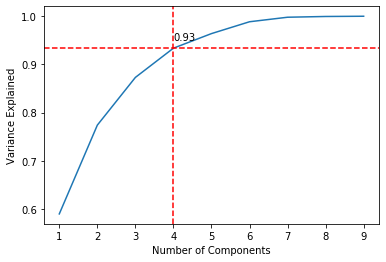

In [172]:
plt.plot(range(1,len(pdf.columns)+1),var_cum)
plt.axhline(y=0.9337,color='r',linestyle='--')
plt.axvline(x=4,color='r',linestyle='--')
plt.text(4, 0.95, r'0.93', fontsize=10)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')

We see that approximately 93% of the variance is explained with the first four components and the increase in variance with the increase in the number of components is less than 5% after the fourth principal component. Hence, we choose 4 as the number of components.

We do PCA again specifying the number of components=4

In [173]:
pca2=PCA(n_components=4,random_state=50)
pdf_final_1=pca2.fit_transform(pdf_scaled)

In [174]:
pdf_final_1.shape

(167, 4)

We can see that the number of variables has now been reduced to 5.

# Outlier Analysis on the PCA Dataset

In [175]:
pca_df=pd.DataFrame(pdf_final_1)
pca_df.columns=['1','2','3','4']

In [176]:
pca_df.head()

,1,2,3,4
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


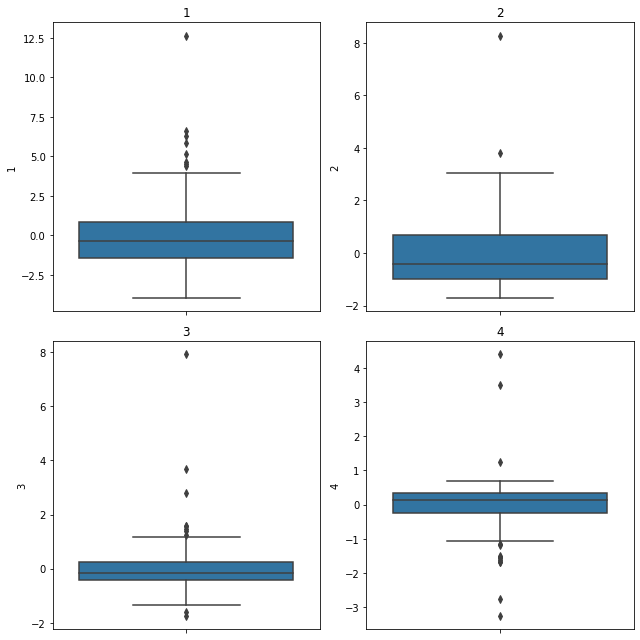

In [177]:
plt.figure(figsize=(9,9))
for i in range(1,5):
    c=str(i)
    plt.subplot(2,2,i)
    sns.boxplot(y=pca_df[c])
    plt.title(c)

plt.tight_layout()
plt.show()

Hence, we observe the presence of outliers in all the Principal Components

In [178]:
#outlier treatment
#Winsorization method with 5% Percentile capping
#We use this method since no rows are removed this way
for i in range(1,5):
    c=str(i)
    q95=pca_df[c].quantile(0.95)
    q05=pca_df[c].quantile(0.05)
    pca_df.loc[pca_df[c]<q05,c]=q05
    pca_df.loc[pca_df[c]>q95,c]=q95

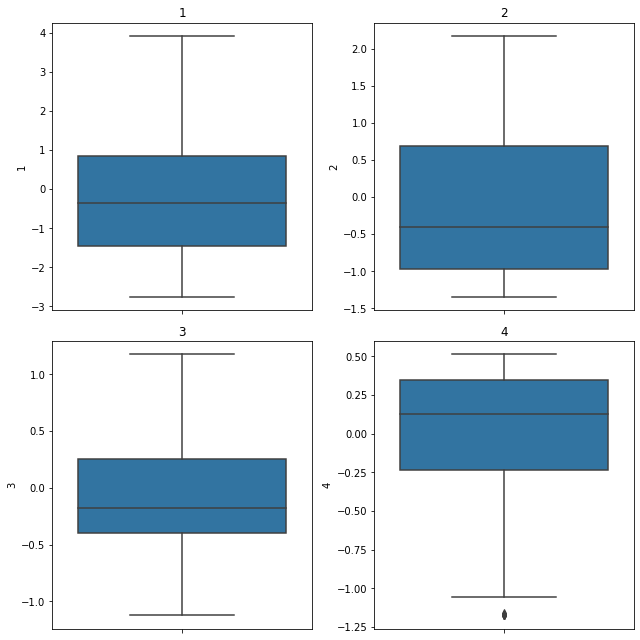

In [179]:
plt.figure(figsize=(9,9))
for i in range(1,5):
    c=str(i)
    plt.subplot(2,2,i)
    sns.boxplot(y=pca_df[c])
    plt.title(c)

plt.tight_layout()
plt.show()

Thus, we observe that most of the outliers have been removed.

# Calculating the Hopkins Statistics to check Cluster Tendency

In [180]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [181]:
for i in range(15):
    print(hopkins(pca_df))

0.7541221525391462
0.8171864670117779
0.8088752374776302
0.8201834813428842
0.7739264157466959
0.7572088296188156
0.8393161837834056
0.7931348543717844
0.7487599043114146
0.7906951516671494
0.7636431397878457
0.7468400937046985
0.782281858874099
0.7817270065615987
0.8185462653036887


Hopkins Statistics is around 0.80 which is greater than 0.5 and therefore, our dataset has a tendency to cluster.

## K-Means Clustering on the new dataset

In [182]:
#importing the required libraries
from sklearn.cluster import KMeans

In [183]:
#on arbitray k
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(np.array(pca_df))
kmeans.labels_

array([1, 3, 3, 1, 0, 3, 3, 2, 2, 3, 0, 0, 3, 0, 3, 2, 3, 1, 3, 3, 0, 3,
       0, 2, 0, 1, 1, 3, 1, 2, 3, 1, 1, 0, 3, 3, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 3, 3, 3, 3, 1, 1, 0, 3, 2, 2, 1, 1, 3, 2, 1, 0, 3, 3, 1, 1, 3,
       1, 0, 2, 3, 3, 3, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 2, 3, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 3, 3, 3, 0, 3, 1, 3, 1, 3,
       2, 2, 1, 1, 2, 0, 1, 0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 3, 0, 1, 0, 0,
       1, 2, 0, 0, 3, 3, 0, 0, 3, 3, 1, 3, 2, 2, 3, 1, 0, 1, 1, 3, 3, 0,
       3, 1, 3, 2, 2, 2, 0, 3, 3, 3, 3, 1, 1])

## Finding the Optimal Number of Clusters

### 1. Elbow Curve

Text(0.5, 0, 'number of clusters')

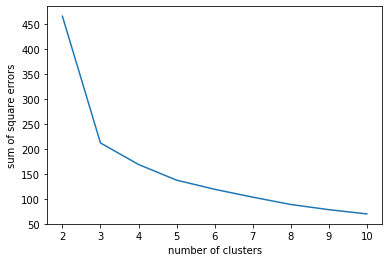

In [184]:
ssd=[]

range_clusters=[2,3,4,5,6,7,8,9,10]

for num_clusters in range_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(np.array(pca_df))
    
    ssd.append(kmeans.inertia_)

plt.plot(range_clusters,ssd)
plt.ylabel('sum of square errors')
plt.xlabel('number of clusters')

We choose the number of clusters as 3 since the elbow curve does not decrease too much after three clusters.

### 2. Silhouette Analysis

In [185]:
from sklearn.metrics import silhouette_score

In [186]:
for num_clusters in range_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(pdf_final_1)
    
    cluster_labels=kmeans.labels_
    
    sa=silhouette_score(pdf_final_1,cluster_labels)
    print("For n_clusters={0},the silhouette score is {1}".format(num_clusters,sa))

For n_clusters=2,the silhouette score is 0.4871359703495424
For n_clusters=3,the silhouette score is 0.5075125590361381
For n_clusters=4,the silhouette score is 0.38816469067646425
For n_clusters=5,the silhouette score is 0.375980441449805
For n_clusters=6,the silhouette score is 0.33150025914078857
For n_clusters=7,the silhouette score is 0.38534079269652055
For n_clusters=8,the silhouette score is 0.3692988468488227
For n_clusters=9,the silhouette score is 0.3704006154507661
For n_clusters=10,the silhouette score is 0.38007155266605197


According to silhouette score and the elbow curve, the optimal number of clusters is 3.

In [187]:
#final model with k=3

kmeans=KMeans(n_clusters=3,max_iter=50,random_state=0)
kmeans.fit(np.array(pca_df))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [188]:
pca_c=pca_df.copy()
pca_c['KMeans_Cluster_ID']=kmeans.labels_

In [189]:
#assigning the label

df['KMeans_Cluster_ID']=kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


## Analysing the dataset based on the k=3 clusters created.

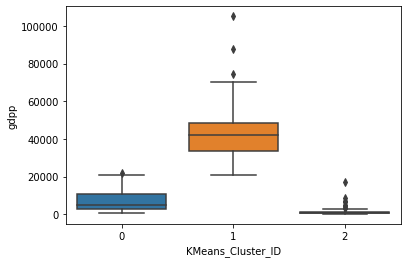

In [190]:
#gdpp
sns.boxplot(x='KMeans_Cluster_ID',y='gdpp',data=df)

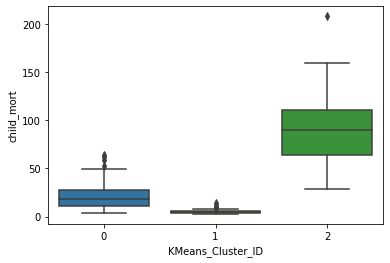

In [191]:
#child_mort
sns.boxplot(x='KMeans_Cluster_ID',y='child_mort',data=df)

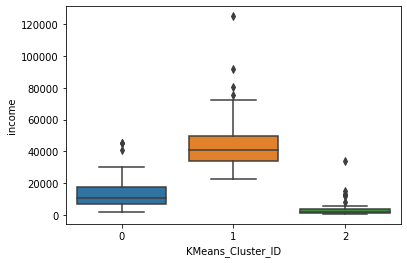

In [192]:
#income
sns.boxplot(x='KMeans_Cluster_ID',y='income',data=df)

### Scatter Plots

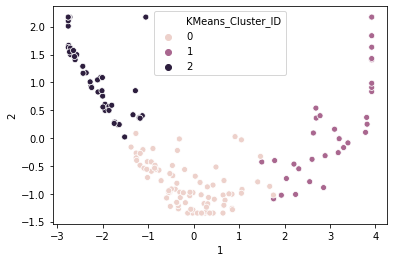

In [193]:
#first two Principal Components
sns.scatterplot(x='1',y='2',hue='KMeans_Cluster_ID',data=pca_c)

Thus, we have the following observations with respect to each cluster

- **Cluster 0**: represents clusters middle values of first component and lower values of second component
- **Cluster 1**: represents clusters with higher values of the first component and values of second component are spread all over.
- **Cluster 2**: represents clusters with lower values of the first component and higher values of the second component.

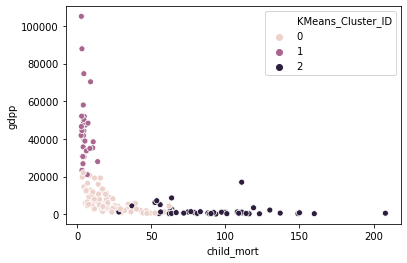

In [194]:
#gdpp vs child_mort
sns.scatterplot(x='child_mort',y='gdpp',hue='KMeans_Cluster_ID',data=df)

- **Cluster 0**: countries with lower gdp and lower child_mort ***(Developing Country)***
- **Cluster 1**: countries with higher gdp and extremely low child_mort ***(Developed Country)***
- **Cluster 2**: countries with extremely low gdp and higher child_mort ***(Under Developed Country)***

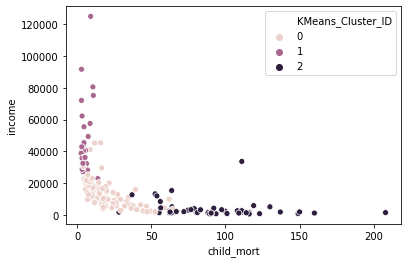

In [195]:
#income vs child_mort
sns.scatterplot(x='child_mort',y='income',hue='KMeans_Cluster_ID',data=df)

We see similar observations in child_mort vs income like we saw in child_mort vs gdpp

## Hierarchical clustering on the PCA Dataset.

In [196]:
#importing the required libraries 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Single Linkage

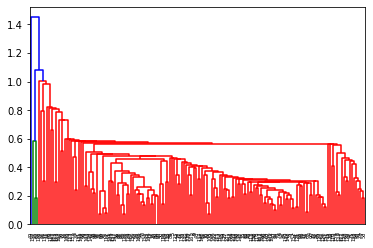

In [197]:
s_mergings=linkage(np.array(pca_df),method='single',metric='euclidean')
dendrogram(s_mergings)
plt.show()

As expected, the dendrogram of Single Linkage is not very clear. Based on the inter cluster distance, n_clusters=1 is the best option which means having only one cluster. Hence, no use of clustering.

### Complete Linkage

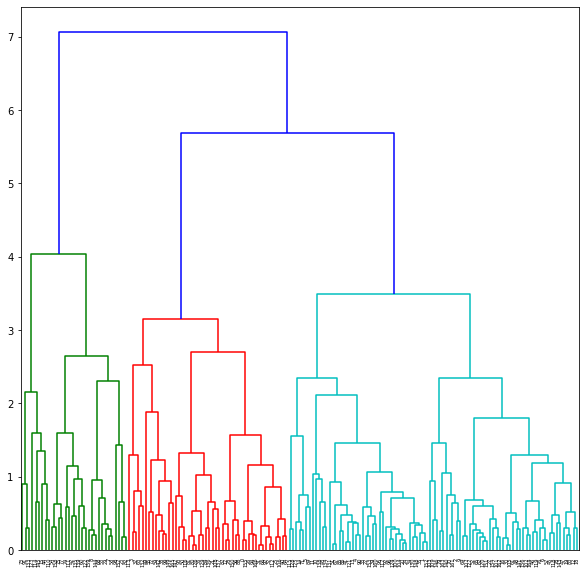

In [198]:
c_mergings=linkage(np.array(pca_df),method='complete',metric='euclidean')
plt.figure(figsize=(10,10))
dendrogram(c_mergings)
plt.show()

From this dendrogram, either n_clusters=3 or n_clusters=4 seem optimal since the inter cluster distance is high enough for both of these . We will do our analysis for both as for both these number of clusters, the intra cluster distance is significantly low and the inter cluster distance is significantly high. 

### For n_clusters=3

In [199]:
cluster_labels3=cut_tree(c_mergings,n_clusters=3).reshape(-1,)

In [200]:
pca_c['H_Clustering_3_ID']=cluster_labels3
pca_c.head()

,1,2,3,4,KMeans_Cluster_ID,H_Clustering_3_ID
0,-2.635575,1.472267,-0.549489,-0.242326,2,0
1,-0.024206,-1.347569,-0.014123,0.450645,0,1
2,-0.459557,-0.675495,0.959355,0.218456,0,1
3,-2.722630,2.171857,0.600215,-0.433978,2,0
4,0.648597,-1.023437,-0.257430,0.289201,0,1


In [201]:
df['H_Clustering_3_ID']=cluster_labels3
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster_ID,H_Clustering_3_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


### Analyzing the two datasets on the cluster obtained

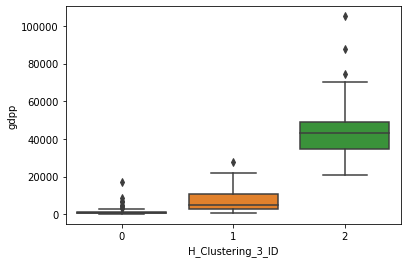

In [202]:
#gdpp
sns.boxplot(x='H_Clustering_3_ID',y='gdpp',data=df)

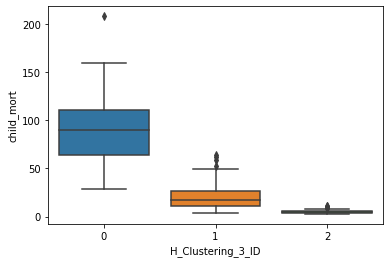

In [203]:
#child_mort
sns.boxplot(x='H_Clustering_3_ID',y='child_mort',data=df)

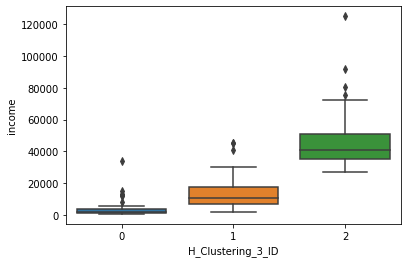

In [204]:
#income
sns.boxplot(x='H_Clustering_3_ID',y='income',data=df)

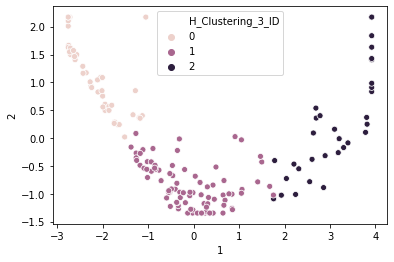

In [205]:
#scatter plot of first and second Principal Components
sns.scatterplot(x='1',y='2',hue='H_Clustering_3_ID',data=pca_c)

With Hierarchical Cluster, with n_clusters=3, we see the similar observation as we saw in KMeans Clustering with k=3.

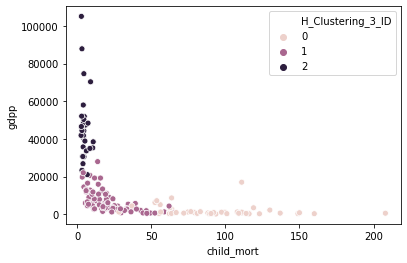

In [206]:
#scatter plot of gdpp vs child_mort
sns.scatterplot(x='child_mort',y='gdpp',hue='H_Clustering_3_ID',data=df)

- **Cluster 0**: Under Developed Country
- **Cluster 1**: Developing Country
- **Cluster 2**: Developed Country

### For n_clusters=4

In [207]:
cluster_labels4=cut_tree(c_mergings,n_clusters=4)
pca_c['H_Clustering_4_ID']=cluster_labels4
df['H_Clustering_4_ID']=cluster_labels4

### Analysing the two datasets on the clusters obtained.

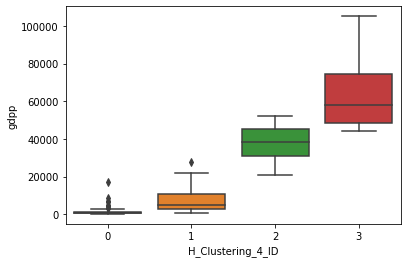

In [208]:
#gdpp
sns.boxplot(x='H_Clustering_4_ID',y='gdpp',data=df)

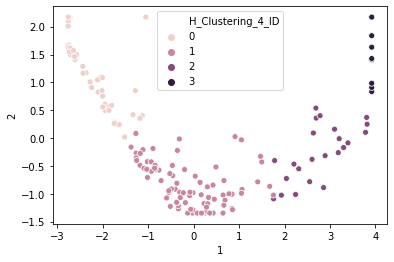

In [209]:
#scatterplot of first two components
sns.scatterplot(x='1',y='2',hue='H_Clustering_4_ID',data=pca_c)

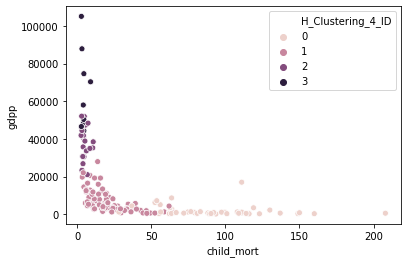

In [210]:
#gdpp vs child_mort
sns.scatterplot(x='child_mort',y='gdpp',hue='H_Clustering_4_ID',data=df)

Hierarchical clustering with n_clusters=4 separates the countries with extremely high gdp as well. But since, as per the business point of view, we require the countries in dire need of help which are the same for both n_clusters=3 and n_clusters=4, we choose number of clusters=3.

### Choosing between KMeans and Hierarchical Clustering

In [211]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster_ID,H_Clustering_3_ID,H_Clustering_4_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1,1


In [212]:
#mapping the cluster IDs to under developed, developing and developed countries
df['KMeans_Cluster_ID']=df['KMeans_Cluster_ID'].map({0:'Developing',1:'Developed',2:'Under Developed'})
df['H_Clustering_3_ID']=df['H_Clustering_3_ID'].map({0:'Under Developed',1:'Developing',2:'Developed'})

In [213]:
#dropping H_Clustering_4_ID
df=df.drop('H_Clustering_4_ID',axis=1)

In [214]:
#checking the similarity between the two kinds of clustering
(df['KMeans_Cluster_ID']==df['H_Clustering_3_ID']).value_counts()

True     166
False      1
dtype: int64

Since there is only one false value, we can choose any of the clustering methods. For our assignment we choose KMeans method.

In [215]:
#dropping H_Clustering_3_ID and renaming KMeans_Cluster_ID to ClusterID

df=df.drop('H_Clustering_3_ID',axis=1)
df=df.rename(columns={'KMeans_Cluster_ID':'ClusterID'})


## Analysis and Visualizations on the chosen method of Clustering

### Scatter Plots

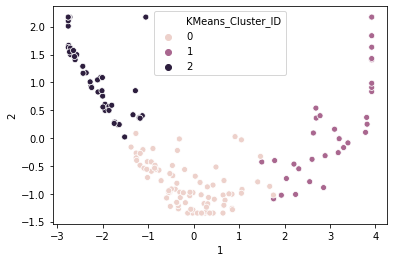

In [216]:
#first two principal components
sns.scatterplot(x='1',y='2',hue='KMeans_Cluster_ID',data=pca_c)

Thus, we have the following observations with respect to each cluster

- **Cluster 0**: represents clusters middle values of first component and lower values of second component
- **Cluster 1**: represents clusters with higher values of the first component and values of second component are spread all over.
- **Cluster 2**: represents clusters with lower values of the first component and higher values of the second component.

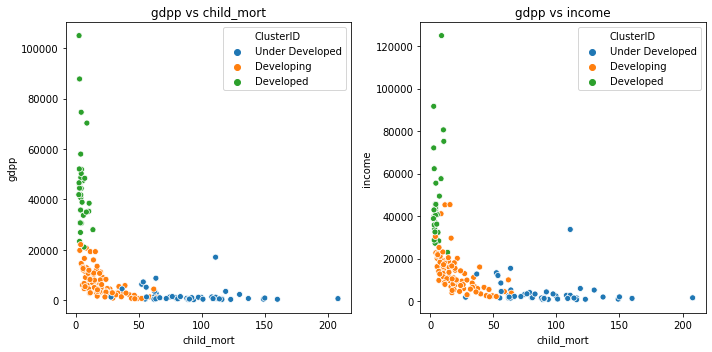

In [217]:
#gdpp vs child_mort and income vs child_mort
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',data=df)
plt.title('gdpp vs child_mort')
plt.subplot(1,2,2)
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=df)
plt.title('gdpp vs income')
plt.tight_layout()
plt.show()

- **Under Developed**: countries with extremely low gdpp and income and higher child_mort 
- **Developing**: countries with lower gdpp and income and lower child_mort 
- **Developed**: countries with higher gdpp and income and extremely low child_mort 

### Boxplots

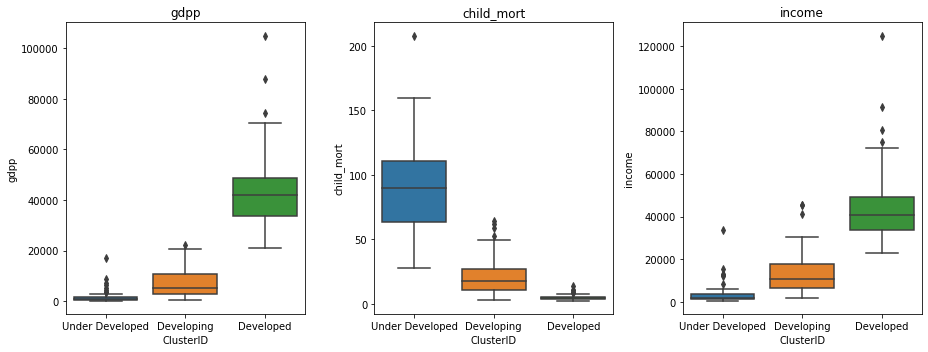

In [218]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
sns.boxplot(x='ClusterID',y='gdpp',data=df)
plt.title('gdpp')
plt.subplot(1,3,2)
sns.boxplot(x='ClusterID',y='child_mort',data=df)
plt.title('child_mort')
plt.subplot(1,3,3)
sns.boxplot(x='ClusterID',y='income',data=df)
plt.title('income')
plt.tight_layout()
plt.show()

- **Under Developed**: countries with highest child_mort and lowest gdpp and income
- **Developing**: countries with middle child_mort, gdpp and income
- **Developed**: countries with highest gdpp and income but lowest child_mort

In [219]:
df.loc[df['ClusterID']=='Under Developed','country'].nunique()

48

We have 48 Under Developed Countries based on the clustering algorithm used. We further find the top most countries in need of dire help.

## Human Development Index (HDI)
We know that HDI (Human Development Index) is used to measure the development of a country. The HDI index uses the following parameters to measure the development.
- life expectancy
- expected years of schooling
- average years of schooling
- gross national income

Income and life expectancy are the two important variables present in our dataset which are related to the parameters used in HDI index.

Please refer to the following link to know more: [Human Development Index](https://ourworldindata.org/human-development-index)

## Calculation of HDI

The HDI utilises four key metrics:

- life expectancy at birth (to assess a long and healthy life);
- expected years of schooling (to assess access to knowledge);
- average years of schooling (to assess access to knowledge);
- gross national income (GNI) per capita (to assess standard of living).

There are two steps to calculating the HDI:
1. **Forming indices for each of the four metrics.**

Values of each of the four metrics must be normalised to an index value of 0 to 1. 

2. **Aggregating the four metrics to produce the HDI.**

Once each of the individual indices have been calculated, they are aggregated to calculate the HDI.

The HDI is calculated as the geometric mean (equally-weighted) of life expectancy, education, and GNI per capita, as shown here:
<br>
**HDI=(Health Index x Education Index x Income Index)^(1/3)**
<br>
<br>
Since we have two of the four metrics mentioned above, which are, life expectancy and per capita income, we use them to find a metric similar to the HDI index.

# Deriving a metric similar to HDI index using Life Expectancy and Income variables.

In [220]:
ud=df.loc[df['ClusterID']=='Under Developed']
ud['Life Expectancy Index']=(ud['life_expec']-ud['life_expec'].min())/(ud['life_expec'].max()-ud['life_expec'].min())
ud['Income Index']=(ud['income']-ud['income'].min())/(ud['income'].max()-ud['income'].min())

In [221]:
under_developed=list(ud['country'])
print(under_developed)
print(len(under_developed))

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
48


In [222]:
ud['HDI']=(ud['Life Expectancy Index']*ud['Income Index'])**(1/2) #exponent value is 1/2 instead of 1/3
                                                                  #since we use only two variables to calculate the HDI here

In [223]:
ud.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Life Expectancy Index,Income Index,HDI
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,Under Developed,0.617949,0.030250,0.136722
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,Under Developed,0.717949,0.159892,0.338813
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,Under Developed,0.761538,0.036596,0.166941
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,Under Developed,0.641026,0.383518,0.495828
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,Under Developed,0.661538,0.024810,0.128113


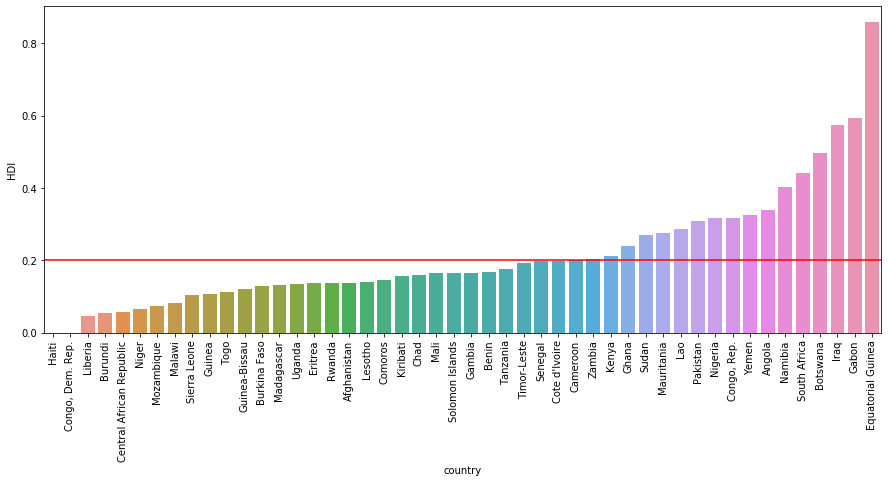

In [224]:
#sorting the countries by HDI index and plotting them
ud=ud.sort_values(by='HDI')
plt.figure(figsize=(15,6))
sns.barplot(x='country',y='HDI',data=ud)
plt.xticks(rotation=90)
plt.axhline(y=0.2,color='r')
plt.show()

We choose all the countries with less than 0.2 HDI.

In [225]:
dire_help1=list(ud.loc[ud['HDI']<=0.2,'country'])
print(len(dire_help1))
print(dire_help1)

30
['Haiti', 'Congo, Dem. Rep.', 'Liberia', 'Burundi', 'Central African Republic', 'Niger', 'Mozambique', 'Malawi', 'Sierra Leone', 'Guinea', 'Togo', 'Guinea-Bissau', 'Burkina Faso', 'Madagascar', 'Uganda', 'Eritrea', 'Rwanda', 'Afghanistan', 'Lesotho', 'Comoros', 'Kiribati', 'Chad', 'Mali', 'Solomon Islands', 'Gambia', 'Benin', 'Tanzania', 'Timor-Leste', 'Senegal', "Cote d'Ivoire"]


The countries in dire need of help are: ***Haiti, Congo Democratic Republic, Liberia, Burundi, Central Africal Republic, Niger, Mozambique, Malawi, Sierra Leone, Guinea, Togo, Guinea-Bissau, Burkina Faso, Madagascar, Uganda, Eritrea, Rwanda, Afghanistan, Lesotho, Comoros, Kiribati, Chad, Mali, Solomon Islands, Gambia, Benin, Tanzania, Timor-Leste, Senegal and Cote d'Ivoire.***
<br>
<br>
These are 30 in number.

In case, we want further reduction we can reduce the threshhold value of HDI to 0.1.

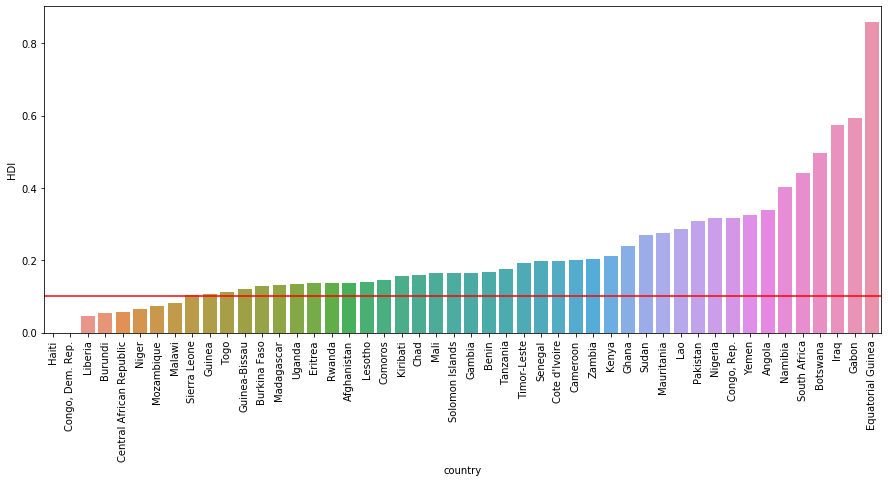

In [226]:
plt.figure(figsize=(15,6))
sns.barplot(x='country',y='HDI',data=ud)
plt.xticks(rotation=90)
plt.axhline(y=0.1,color='r')
plt.show()

In [227]:
dire_help2=list(ud.loc[ud['HDI']<=0.1,'country'])
print(len(dire_help2))
print(dire_help2)

8
['Haiti', 'Congo, Dem. Rep.', 'Liberia', 'Burundi', 'Central African Republic', 'Niger', 'Mozambique', 'Malawi']


The countries in higher priority should be the following: ***Haiti, Congo Democratic Republic, Liberia, Burundi, Central African Republic, Niger, Mozambique, Malawi***.
<br>
<br>
These are 8 in number.

**Note:** We can select the countries belonging to the Under Developed Cluster based on the threshold value of HDI decided by the CEO to find the countries to focus on.